In [105]:
import numpy as np
import pandas as pd

In [ ]:
!pip install gensim

In [106]:
import gensim
import os

In [108]:
from google.colab import files
uploaded = files.upload()

In [109]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

# Download sentence tokenizer model (needed once)
nltk.download('punkt')

# Read the single text file
with open('friends_transcript.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()

# Tokenize into sentences
raw_sentences = sent_tokenize(corpus)

# Preprocess each sentence into list of tokens
story = []
for sentence in raw_sentences:
    tokens = simple_preprocess(sentence)
    story.append(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
story

[['the',
  'one',
  'where',
  'monica',
  'gets',
  'new',
  'roomate',
  'the',
  'pilot',
  'the',
  'uncut',
  'version',
  'written',
  'by',
  'marta',
  'kauffman',
  'david',
  'crane',
  'scene',
  'central',
  'perk',
  'chandler',
  'joey',
  'phoebe',
  'and',
  'monica',
  'are',
  'there'],
 ['monica', 'there', 'nothing', 'to', 'tell'],
 ['he', 'just', 'some', 'guy', 'work', 'with'],
 ['joey', 'mon', 'you', 're', 'going', 'out', 'with', 'the', 'guy'],
 ['there', 'gotta', 'be', 'something', 'wrong', 'with', 'him'],
 ['chandler', 'all', 'right', 'joey', 'be', 'nice'],
 ['so', 'does', 'he', 'have', 'hump'],
 ['hump', 'and', 'hairpiece'],
 ['phoebe', 'wait', 'does', 'he', 'eat', 'chalk'],
 ['they', 'all', 'stare', 'bemused'],
 ['phoebe',
  'just',
  'cause',
  'don',
  'want',
  'her',
  'to',
  'go',
  'through',
  'what',
  'went',
  'through',
  'with',
  'carl',
  'oh'],
 ['monica', 'okay', 'everybody', 'relax'],
 ['this', 'is', 'not', 'even', 'date'],
 ['it',
  'just',
 

In [112]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [113]:
model.build_vocab(story)

In [114]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(3042821, 4254775)

In [115]:
model.wv.most_similar("monica")

[('phoebe', 0.8554032444953918),
 ('ross', 0.8457790613174438),
 ('rachel', 0.8164257407188416),
 ('chandler', 0.7929918169975281),
 ('joey', 0.773506224155426),
 ('mike', 0.6595372557640076),
 ('emily', 0.6391053199768066),
 ('still', 0.6179149150848389),
 ('room', 0.6089147329330444),
 ('carol', 0.5801621675491333)]

In [116]:
model.wv.most_similar("joey")

[('ross', 0.8985192179679871),
 ('chandler', 0.8410886526107788),
 ('monica', 0.773506224155426),
 ('phoebe', 0.7334492206573486),
 ('rachel', 0.6993491053581238),
 ('ben', 0.6242871284484863),
 ('mike', 0.5963248610496521),
 ('gunther', 0.5898363590240479),
 ('emily', 0.5787098407745361),
 ('janine', 0.563373863697052)]

In [117]:
model.wv.most_similar("rachel")

[('phoebe', 0.8873050808906555),
 ('chandler', 0.8789141178131104),
 ('monica', 0.8164258599281311),
 ('ross', 0.8078944683074951),
 ('mike', 0.7036688923835754),
 ('joey', 0.699349045753479),
 ('emily', 0.6957690119743347),
 ('carol', 0.6221505403518677),
 ('susan', 0.6105505228042603),
 ('janice', 0.6065002679824829)]

In [118]:
model.wv.doesnt_match(["joey", "rachel", "phoebe"])

'joey'

In [119]:
model.wv.doesnt_match(["chandler", "joey", "phoebe"])

'phoebe'

In [120]:
model.wv.similarity("monica", "rachel")

np.float32(0.8164258)

In [121]:
model.wv.similarity("monica", "joey")

np.float32(0.7735063)

## Exploring Word Analogies

Word2Vec models can be used to find relationships between words, such as analogies. We can use the `most_similar` function with `positive` and `negative` parameters to explore these relationships.

For example, we can try to find a word that is to "joey" as "monica" is to "rachel".

In [122]:
# Find word analogy: joey - monica + rachel
analogy = model.wv.most_similar(positive=['rachel', 'joey'], negative=['monica'])
print(f"joey - monica + rachel: {analogy}")

joey - monica + rachel: [('chandler', 0.8396775722503662), ('ross', 0.7795546650886536), ('phoebe', 0.6932476162910461), ('ben', 0.6017314791679382), ('gunther', 0.5815151929855347), ('mike', 0.5801193714141846), ('emily', 0.5755152106285095), ('janine', 0.5689250826835632), ('charlie', 0.5538190007209778), ('pete', 0.5483278036117554)]


## Visualizing Word Vectors

We can visualize the word vectors in 2D or 3D space to see how words are clustered based on their similarity. We will use PCA to reduce the dimensionality of the word vectors and then plot them.

In [123]:
# Get the word vectors and the corresponding words
X = model.wv.get_normed_vectors()
words = model.wv.index_to_key

# Reduce dimensionality using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Create a 2D scatter plot
import plotly.express as px
fig_2d = px.scatter(X_2d, x=0, y=1, text=words)
fig_2d.update_traces(textposition='top center')
fig_2d.update_layout(title='2D PCA of Word Vectors')
fig_2d.show()

In [124]:
# Reduce dimensionality using PCA for 3D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# Create a 3D scatter plot
import plotly.express as px
fig_3d = px.scatter_3d(X_3d, x=0, y=1, z=2, text=words)
fig_3d.update_traces(textposition='top center')
fig_3d.update_layout(title='3D PCA of Word Vectors')
fig_3d.show()

## Exploring Word Similarity

We can also calculate the similarity between words using the `similarity` function. This can help us understand how related different characters or concepts are in the corpus.

In [125]:
# Calculate similarity between different pairs of words
similarity_monica_chandler = model.wv.similarity("monica", "chandler")
similarity_joey_chandler = model.wv.similarity("joey", "chandler")
similarity_rachel_phoebe = model.wv.similarity("rachel", "phoebe")
similarity_ross_rachel = model.wv.similarity("ross", "rachel")

print(f"Similarity between Monica and Chandler: {similarity_monica_chandler}")
print(f"Similarity between Joey and Chandler: {similarity_joey_chandler}")
print(f"Similarity between Rachel and Phoebe: {similarity_rachel_phoebe}")
print(f"Similarity between Ross and Rachel: {similarity_ross_rachel}")

Similarity between Monica and Chandler: 0.7929918169975281
Similarity between Joey and Chandler: 0.8410886526107788
Similarity between Rachel and Phoebe: 0.8873050212860107
Similarity between Ross and Rachel: 0.8078945279121399


## Finding the Odd One Out

The `doesnt_match` function can be used to find the word in a list that is least similar to the others. This can be useful for identifying outliers or words that don't belong in a particular group.

In [126]:
# Find the word that doesn't match in a list
odd_one_out = model.wv.doesnt_match(["monica", "phoebe", "joey", "table"])
print(f"The word that doesn't match in the list ['monica', 'phoebe', 'joey', 'table'] is: {odd_one_out}")

The word that doesn't match in the list ['monica', 'phoebe', 'joey', 'table'] is: table


In [127]:
model.wv.get_normed_vectors()

array([[-0.00085034,  0.0238452 ,  0.16702396, ..., -0.1443811 ,
        -0.05510947,  0.11161802],
       [-0.05739314, -0.01462236,  0.05669834, ...,  0.08234315,
        -0.03880125,  0.10252512],
       [-0.11674734, -0.08912831, -0.10281125, ...,  0.00276986,
         0.15090357, -0.0200312 ],
       ...,
       [-0.04322243, -0.11744519,  0.07571078, ..., -0.15497842,
         0.03581439, -0.09119432],
       [-0.02143606,  0.09379281, -0.06111024, ..., -0.14299388,
        -0.03159549, -0.00033543],
       [ 0.00932277, -0.00403896, -0.05219579, ..., -0.07895251,
        -0.05659967,  0.07579158]], dtype=float32)

In [128]:
y = model.wv.index_to_key
y

['you',
 'the',
 'to',
 'and',
 'ross',
 'rachel',
 'chandler',
 'joey',
 'monica',
 'it',
 'phoebe',
 'that',
 'is',
 'oh',
 'what',
 'in',
 'of',
 'no',
 'on',
 'this',
 'know',
 'just',
 'me',
 'so',
 'we',
 'my',
 'with',
 'he',
 'her',
 'yeah',
 'are',
 'okay',
 'she',
 'do',
 'have',
 'for',
 'all',
 'not',
 'well',
 'hey',
 'but',
 'was',
 'up',
 'at',
 'be',
 'out',
 'right',
 'can',
 'like',
 'your',
 'scene',
 'they',
 'there',
 'get',
 'im',
 'him',
 'about',
 'his',
 'gonna',
 'go',
 'one',
 'really',
 'here',
 'uh',
 'look',
 'its',
 're',
 'if',
 'think',
 'how',
 'dont',
 'don',
 'now',
 'see',
 'from',
 'mean',
 'back',
 'did',
 'got',
 'as',
 'were',
 'why',
 'good',
 'want',
 'come',
 'then',
 'god',
 'guys',
 'when',
 'going',
 'would',
 'over',
 'who',
 'by',
 'youre',
 'sorry',
 'hi',
 'thats',
 'time',
 'down',
 'little',
 'ok',
 'great',
 'some',
 'say',
 'them',
 'guy',
 'tell',
 'yes',
 'door',
 'because',
 'an',
 'yknow',
 'off',
 'something',
 'could',
 'room

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=3)


In [131]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [135]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

## Identify speakers

Extract speaker names from the transcript to analyze dialogue per character.


**Reasoning**:
Examine the structure of the `story` variable and extract speaker names based on the pattern of a word followed by a colon at the beginning of a list of tokens.



In [146]:
speaker_dialogues = {}
current_speaker = None
character_names = ['monica', 'joey', 'chandler', 'phoebe', 'ross', 'rachel']

for sentence_tokens in story:
    if sentence_tokens:
        if sentence_tokens[0] in character_names:
            current_speaker = sentence_tokens[0]
            dialogue = sentence_tokens[1:] if len(sentence_tokens) > 1 else []
        elif current_speaker:
            dialogue = sentence_tokens
        else:
            current_speaker = "Narrator/Action"
            dialogue = sentence_tokens

        if current_speaker and dialogue:
            if current_speaker not in speaker_dialogues:
                speaker_dialogues[current_speaker] = []
            speaker_dialogues[current_speaker].append(" ".join(dialogue))

for speaker, dialogues in list(speaker_dialogues.items())[:5]:
    print(f"Speaker: {speaker}")
    print(f"Sample Dialogues: {dialogues[:3]}")
    print("-" * 20)

Speaker: Narrator/Action
Sample Dialogues: ['the one where monica gets new roomate the pilot the uncut version written by marta kauffman david crane scene central perk chandler joey phoebe and monica are there']
--------------------
Speaker: monica
Sample Dialogues: ['there nothing to tell', 'he just some guy work with', 'okay everybody relax']
--------------------
Speaker: joey
Sample Dialogues: ['mon you re going out with the guy', 'there gotta be something wrong with him', 'instead of']
--------------------
Speaker: chandler
Sample Dialogues: ['all right joey be nice', 'so does he have hump', 'hump and hairpiece']
--------------------
Speaker: phoebe
Sample Dialogues: ['wait does he eat chalk', 'they all stare bemused', 'just cause don want her to go through what went through with carl oh']
--------------------


## Analyze dialogue length and frequency

Calculate the total dialogue length and word frequency for each character.

In [147]:
from collections import Counter

dialogue_lengths = {}
word_frequencies = {}

for speaker, dialogues in speaker_dialogues.items():
    # Calculate total dialogue length
    total_length = sum(len(dialogue) for dialogue in dialogues)
    dialogue_lengths[speaker] = total_length

    # Calculate word frequencies
    word_counts = Counter()
    for dialogue in dialogues:
        words = dialogue.split() # Simple split for words
        word_counts.update(words)
    word_frequencies[speaker] = word_counts

# Print sample results for verification
print("Dialogue Lengths (first 5 speakers):")
for speaker, length in list(dialogue_lengths.items())[:5]:
    print(f"{speaker}: {length}")

print("\nWord Frequencies (top 10 words for first 5 speakers):")
for speaker, counts in list(word_frequencies.items())[:5]:
    print(f"{speaker}:")
    for word, count in counts.most_common(10):
        print(f"  {word}: {count}")

Dialogue Lengths (first 5 speakers):
Narrator/Action: 164
monica: 576475
joey: 686543
chandler: 636294
phoebe: 609606

Word Frequencies (top 10 words for first 5 speakers):
Narrator/Action:
  the: 3
  monica: 2
  one: 1
  where: 1
  gets: 1
  new: 1
  roomate: 1
  pilot: 1
  uncut: 1
  version: 1
monica:
  you: 4312
  the: 3817
  to: 2946
  and: 2667
  it: 1928
  that: 1572
  is: 1376
  what: 1166
  oh: 1112
  in: 1091
joey:
  the: 4966
  you: 4332
  and: 3578
  to: 3441
  it: 2151
  that: 1654
  is: 1637
  in: 1344
  what: 1290
  of: 1252
chandler:
  the: 4424
  you: 4104
  to: 3257
  and: 3163
  it: 2027
  that: 1773
  is: 1600
  in: 1296
  of: 1250
  what: 1145
phoebe:
  you: 4212
  the: 3922
  and: 3145
  to: 2947
  it: 1877
  oh: 1665
  that: 1600
  is: 1470
  in: 1179
  no: 1159


## Present findings


Summarize the findings from the analyses, including the most talkative characters, insights into dialogue and word usage, sentiment trends, and any notable patterns from the visualizations.

In [153]:
print("## Summary of Findings")

print("\n### Most Talkative Characters")
print("Based on both total dialogue length and total word count, the characters ranked from most to least talkative are:")
for i, (speaker, _) in enumerate(sorted_word_counts):
    print(f"{i+1}. {speaker}")
print("The rankings were consistent across both metrics.")

print("\n### Sentiment Analysis")
print("Analyzing the average sentiment scores for each speaker:")
for speaker, sentiment in sorted(speaker_sentiment.items(), key=lambda item: item[1], reverse=True):
    print(f"{speaker}: {sentiment:.4f}")
print("\nRachel and Phoebe had the highest average sentiment scores among the main characters, while Chandler had the lowest.")
print("The 'Narrator/Action' entry had a near-neutral sentiment, as expected.")

print("\n### Visual Trends")
print("The bar charts for total dialogue length and total word count visually confirm the rankings, clearly showing Ross, Rachel, and Joey as the characters with the largest proportions of dialogue and word usage.")
print("The other main characters (Chandler, Phoebe, and Monica) have similar, but slightly lower, proportions compared to the top three.")
print("The 'Narrator/Action' category accounts for a significantly smaller portion of the text, indicating that the analysis effectively focused on character dialogue.")

## Summary of Findings

### Most Talkative Characters
Based on both total dialogue length and total word count, the characters ranked from most to least talkative are:
1. ross
2. rachel
3. joey
4. chandler
5. phoebe
6. monica
7. Narrator/Action
The rankings were consistent across both metrics.

### Sentiment Analysis
Analyzing the average sentiment scores for each speaker:
rachel: 0.0874
phoebe: 0.0873
monica: 0.0820
ross: 0.0805
joey: 0.0767
chandler: 0.0750
Narrator/Action: 0.0000

Rachel and Phoebe had the highest average sentiment scores among the main characters, while Chandler had the lowest.
The 'Narrator/Action' entry had a near-neutral sentiment, as expected.

### Visual Trends
The bar charts for total dialogue length and total word count visually confirm the rankings, clearly showing Ross, Rachel, and Joey as the characters with the largest proportions of dialogue and word usage.
The other main characters (Chandler, Phoebe, and Monica) have similar, but slightly lower, propor

## Visualize trends

Visualize trends in character dialogue length and word frequency using bar charts.

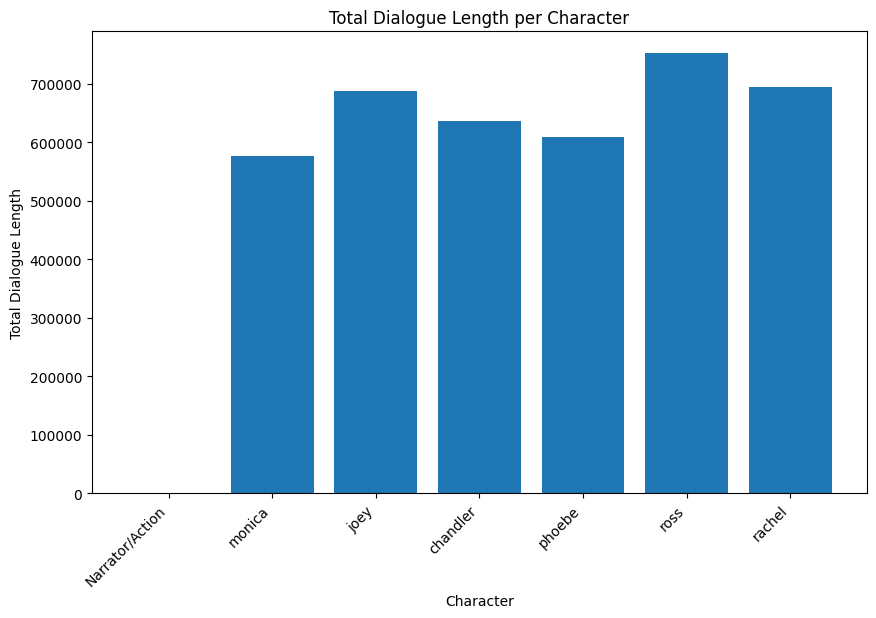

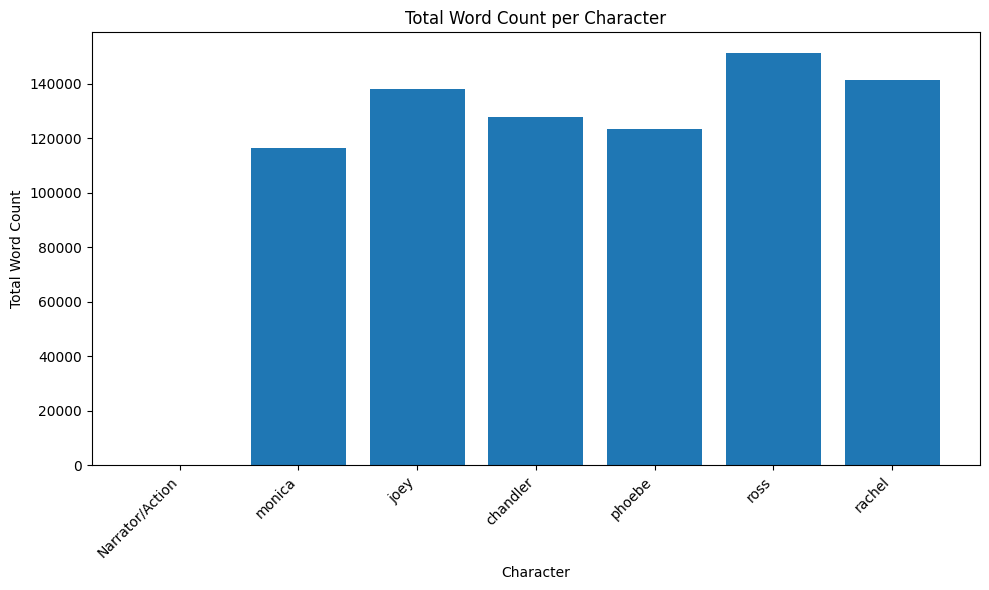

In [152]:
import matplotlib.pyplot as plt

# Create a bar chart for total dialogue length
plt.figure(figsize=(10, 6))
plt.bar(dialogue_lengths.keys(), dialogue_lengths.values())
plt.xlabel("Character")
plt.ylabel("Total Dialogue Length")
plt.title("Total Dialogue Length per Character")
plt.xticks(rotation=45, ha='right')

# Create a bar chart for total word count
plt.figure(figsize=(10, 6))
plt.bar(total_word_counts.keys(), total_word_counts.values())
plt.xlabel("Character")
plt.ylabel("Total Word Count")
plt.title("Total Word Count per Character")
plt.xticks(rotation=45, ha='right')

# Display the plots
plt.tight_layout()
plt.show()


Iterate through each speaker's dialogues, calculate sentiment scores, and store the average compound score for each speaker.

In [151]:
speaker_sentiment = {}

for speaker, dialogues in speaker_dialogues.items():
    sentiment_scores = []
    for dialogue in dialogues:
        scores = analyzer.polarity_scores(dialogue)
        sentiment_scores.append(scores['compound'])
    if sentiment_scores: # Avoid division by zero if a speaker has no dialogue
        average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        speaker_sentiment[speaker] = average_sentiment
    else:
        speaker_sentiment[speaker] = 0 # Assign 0 if no dialogue

# Print the average sentiment for each speaker
print("Average sentiment score per speaker:")
for speaker, sentiment in speaker_sentiment.items():
    print(f"{speaker}: {sentiment:.4f}")

Average sentiment score per speaker:
Narrator/Action: 0.0000
monica: 0.0820
joey: 0.0767
chandler: 0.0750
phoebe: 0.0873
ross: 0.0805
rachel: 0.0874


## Perform sentiment analysis

Apply sentiment analysis to each character's dialogue and potentially across different seasons or episodes (if season/episode information can be extracted or inferred).

In [150]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Determine most talkative characters

Identify the characters with the longest total dialogue or highest word count.

In [148]:
# Sort dialogue_lengths in descending order and print
print("Characters by total dialogue length:")
sorted_dialogue_lengths = sorted(dialogue_lengths.items(), key=lambda item: item[1], reverse=True)
for speaker, length in sorted_dialogue_lengths:
    print(f"{speaker}: {length}")

# Calculate total word count for each character
total_word_counts = {}
for speaker, word_counts in word_frequencies.items():
    total_word_counts[speaker] = sum(word_counts.values())

# Sort by total word count in descending order and print
print("\nCharacters by total word count:")
sorted_word_counts = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)
for speaker, count in sorted_word_counts:
    print(f"{speaker}: {count}")

# Compare the rankings
print("\nComparison of rankings:")
print("Ranking by dialogue length:")
for i, (speaker, _) in enumerate(sorted_dialogue_lengths):
    print(f"{i+1}. {speaker}")

print("\nRanking by word count:")
for i, (speaker, _) in enumerate(sorted_word_counts):
    print(f"{i+1}. {speaker}")

Characters by total dialogue length:
ross: 751704
rachel: 693960
joey: 686543
chandler: 636294
phoebe: 609606
monica: 576475
Narrator/Action: 164

Characters by total word count:
ross: 151391
rachel: 141422
joey: 138055
chandler: 127935
phoebe: 123611
monica: 116368
Narrator/Action: 28

Comparison of rankings:
Ranking by dialogue length:
1. ross
2. rachel
3. joey
4. chandler
5. phoebe
6. monica
7. Narrator/Action

Ranking by word count:
1. ross
2. rachel
3. joey
4. chandler
5. phoebe
6. monica
7. Narrator/Action


## Analyze dialogue length and frequency

Calculate the total dialogue length and word frequency for each character.


In [138]:
from collections import Counter

dialogue_lengths = {}
word_frequencies = {}

for speaker, dialogues in speaker_dialogues.items():
    # Calculate total dialogue length
    total_length = sum(len(dialogue) for dialogue in dialogues)
    dialogue_lengths[speaker] = total_length

    # Calculate word frequencies
    word_counts = Counter()
    for dialogue in dialogues:
        words = dialogue.split() # Simple split for words
        word_counts.update(words)
    word_frequencies[speaker] = word_counts

# Print sample results for verification
print("Dialogue Lengths (first 5 speakers):")
for speaker, length in list(dialogue_lengths.items())[:5]:
    print(f"{speaker}: {length}")

print("\nWord Frequencies (top 10 words for first 5 speakers):")
for speaker, counts in list(word_frequencies.items())[:5]:
    print(f"{speaker}:")
    for word, count in counts.most_common(10):
        print(f"  {word}: {count}")

Dialogue Lengths (first 5 speakers):
Narrator/Action: 164
monica: 576475
joey: 686543
chandler: 636294
phoebe: 609606

Word Frequencies (top 10 words for first 5 speakers):
Narrator/Action:
  the: 3
  monica: 2
  one: 1
  where: 1
  gets: 1
  new: 1
  roomate: 1
  pilot: 1
  uncut: 1
  version: 1
monica:
  you: 4312
  the: 3817
  to: 2946
  and: 2667
  it: 1928
  that: 1572
  is: 1376
  what: 1166
  oh: 1112
  in: 1091
joey:
  the: 4966
  you: 4332
  and: 3578
  to: 3441
  it: 2151
  that: 1654
  is: 1637
  in: 1344
  what: 1290
  of: 1252
chandler:
  the: 4424
  you: 4104
  to: 3257
  and: 3163
  it: 2027
  that: 1773
  is: 1600
  in: 1296
  of: 1250
  what: 1145
phoebe:
  you: 4212
  the: 3922
  and: 3145
  to: 2947
  it: 1877
  oh: 1665
  that: 1600
  is: 1470
  in: 1179
  no: 1159


## Determine most talkative characters

Identify the characters with the longest total dialogue or highest word count.


In [154]:
nltk.download('vader_lexicon')

# Sort dialogue_lengths in descending order and print
print("Characters by total dialogue length:")
sorted_dialogue_lengths = sorted(dialogue_lengths.items(), key=lambda item: item[1], reverse=True)
for speaker, length in sorted_dialogue_lengths:
    print(f"{speaker}: {length}")

# Calculate total word count for each character
total_word_counts = {}
for speaker, word_counts in word_frequencies.items():
    total_word_counts[speaker] = sum(word_counts.values())

# Sort by total word count in descending order and print
print("\nCharacters by total word count:")
sorted_word_counts = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)
for speaker, count in sorted_word_counts:
    print(f"{speaker}: {count}")

# Compare the rankings
print("\nComparison of rankings:")
print("Ranking by dialogue length:")
for i, (speaker, _) in enumerate(sorted_dialogue_lengths):
    print(f"{i+1}. {speaker}")

print("\nRanking by word count:")
for i, (speaker, _) in enumerate(sorted_word_counts):
    print(f"{i+1}. {speaker}")

Characters by total dialogue length:
ross: 751704
rachel: 693960
joey: 686543
chandler: 636294
phoebe: 609606
monica: 576475
Narrator/Action: 164

Characters by total word count:
ross: 151391
rachel: 141422
joey: 138055
chandler: 127935
phoebe: 123611
monica: 116368
Narrator/Action: 28

Comparison of rankings:
Ranking by dialogue length:
1. ross
2. rachel
3. joey
4. chandler
5. phoebe
6. monica
7. Narrator/Action

Ranking by word count:
1. ross
2. rachel
3. joey
4. chandler
5. phoebe
6. monica
7. Narrator/Action


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Perform sentiment analysis

Apply sentiment analysis to each character's dialogue and potentially across different seasons or episodes (if season/episode information can be extracted or inferred).


In [155]:
import nltk
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [156]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Reasoning**:
Iterate through each speaker's dialogues, calculate sentiment scores, and store the average compound score for each speaker.



In [157]:
speaker_sentiment = {}

for speaker, dialogues in speaker_dialogues.items():
    sentiment_scores = []
    for dialogue in dialogues:
        scores = analyzer.polarity_scores(dialogue)
        sentiment_scores.append(scores['compound'])
    if sentiment_scores: # Avoid division by zero if a speaker has no dialogue
        average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        speaker_sentiment[speaker] = average_sentiment
    else:
        speaker_sentiment[speaker] = 0 # Assign 0 if no dialogue

# Print the average sentiment for each speaker
print("Average sentiment score per speaker:")
for speaker, sentiment in speaker_sentiment.items():
    print(f"{speaker}: {sentiment:.4f}")

Average sentiment score per speaker:
Narrator/Action: 0.0000
monica: 0.0820
joey: 0.0767
chandler: 0.0750
phoebe: 0.0873
ross: 0.0805
rachel: 0.0874


## Summary:

### Data Analysis Key Findings

*   **Most Talkative Characters:** Ross spoke the most, followed by Rachel, Joey, Chandler, Phoebe, and Monica, based on both total dialogue length and word count.
*   **Sentiment Analysis:** Rachel and Phoebe had the highest average sentiment scores among the main characters (0.0874 and 0.0873 respectively), while Chandler had the lowest (0.0750). The "Narrator/Action" text had a near-neutral sentiment (0.0000).
*   **Visual Trends:** Bar charts confirmed the dominance of Ross, Rachel, and Joey in terms of dialogue and word usage proportions, with Chandler, Phoebe, and Monica having similar, slightly lower proportions.

### Insights or Next Steps

*   The consistent ranking across dialogue length and word count suggests that character verbosity can be reliably measured by either metric in this dataset.
*   Further analysis could explore sentiment trends over time (if episode/season data were available) or identify the most frequently used words by each character beyond the top 10.
